# Chapter 6 확률변수

In [32]:
%precision 3

'%.3f'

## 6-1. 이산확률변수

### [실습] 예제 6-1: 확률변수 X의 상태공간(Sx) 구하기
주사위 두 번 던지기. 확률변수 X = |i - j|, Sx = ?

In [2]:
X = list()
for i in range(1,7):
    for j in range(1, 7):
        X.append( abs(i-j)  )
Sx = set(X)
print(f'확률변수 X의 상태공간(Sx) = {Sx}')

확률변수 X의 상태공간(Sx) = {0, 1, 2, 3, 4, 5}


In [20]:
import random

N = 100
X = list()
for k in range(N):
    i = random.randint(1, 6)
    j = random.randint(1, 6)
    X.append( abs(i-j) )
#     print(f'시행횟수({k+1:>3}) - D1:{i}, D2:{j}, [i-j]:{abs(i-j)} ')
# print(X)
Sx = set(X)
print(f'확률변수 X의 상태공간(Sx) = {Sx}')

확률변수 X의 상태공간(Sx) = {0, 1, 2, 3, 4, 5}


### [확률변수 예] 붓꽃데이터 가져오기
-꽃잎(sepal), 꽃받침(petal)의 length, width, 붓꽃의 종류(species)가 모두 확률변수로 사용될 수 있다.

In [23]:
# 통계 시각화 라이브러리
!pip install seaborn

In [26]:
import seaborn as sns

iris = sns.load_dataset('iris')
print( type(iris) )
iris.head(3)

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### [실습] 예제6-3 확률질량함수로 확률구하기
주사위 두 번 던지기. 확률변수 X = |i - j|, Sx 원소에 대한 확률함수


##### 확률질량함수(PMF: probability mass function) 
이산확률변수의 확률분포를 나타내는 함수 <br><br>

- 1. 확률변수 X에 대한 상태공간 구하기

In [28]:
# 1. 확률변수 X에 대한 상태공간 구하기
X = list()   # 확률변수
D1 = [1,2,3,4,5,6]
D2 = [1,2,3,4,5,6]
for i in D1:
    for j in D2:
        X.append( abs(i-j)  )
Sx = set(X)
print(f'확률변수 X의 상태공간(Sx) = {Sx}')

확률변수 X의 상태공간(Sx) = {0, 1, 2, 3, 4, 5}


- 2. 확률변수에 대한 확률질량함수(fx) 만들기

In [ ]:
# 소수점 자리수 표현
%precision 3

In [52]:
# 2. 확률변수에 대한 확률질량함수(fx) 만들기
def f(x):
    cnt = 0
    for i in D1:
        for j in D2:
            if abs(i-j) == x:
                cnt += 1
            
    return cnt / (len(D1)*len(D2))

probs = [ f(x) for x in Sx ]
probs

[0.167, 0.278, 0.222, 0.167, 0.111, 0.056]

- **확률 전체의 합은 1**

In [53]:
sum(probs)

1.000

- 확률변수 X의 상태 값과 확률 함께 표시

In [54]:
dict(zip(Sx, probs))

{0: 0.167, 1: 0.278, 2: 0.222, 3: 0.167, 4: 0.111, 5: 0.056}

- 3.확률변수 X와 확률의 관계를 그래프로 나타내기

[0, 1, 2, 3, 4, 5] [0.16666666666666666, 0.2777777777777778, 0.2222222222222222, 0.16666666666666666, 0.1111111111111111, 0.05555555555555555]


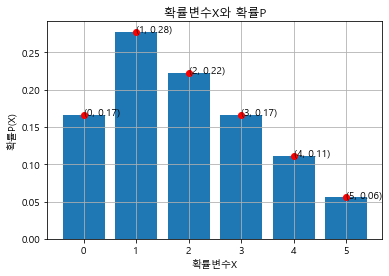

In [56]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

X = list(Sx)
Y = probs
print(f'확률변수(X) : {X}')
print(f'확률(Y) : {Y}')

plt.bar(X, Y, zorder=1)
plt.scatter(X, Y, c='r', zorder=2)
for x, y in zip(X, Y):
    plt.text(x, y, (x, round(y,2)), fontsize=10)

plt.grid()
plt.title('확률변수X와 확률P')
plt.xlabel('확률변수X')
plt.ylabel('확률P(X)')
plt.show()

### [실습] 확률질량함수와 확률 구하기
동전 네 번 던지기, 앞면이 나온 횟수 X 

In [16]:
import itertools

# 1.상태공간Sx
coin = {'H', 'T'}  # 'HT'
r = 4
Sx = list(itertools.product(coin, repeat=r))
Sx = [ ''.join(x) for x in Sx]
print(f'동전 {r}번 던지는 상태공간(Sx):\n{Sx}')

# 2.확률변수X
S = [x.count('H') for x in Sx]
X = list(set(S))
print(f'확률변수(X) : {X}')

# 3.확률질량함수(fx)
def f(x):
    return S.count(x)/len(Sx)

# 4.확률
prob =[ f(x) for x in X] 
print(f'확률변수X의 확률: { dict(zip(X, prob)) }') 

# 5.확률 구하기
print(f'(b) 2일 확률: {f(2)}')
print(f'(c) 2이상일 확률: {sum([f(x) for x in X if x>=2])}')
print(f'(c) 3이하일 확률: {sum([f(x) for x in X if x<=3])}')

동전 4번 던지는 상태공간(Sx):
['HHHH', 'HHHT', 'HHTH', 'HHTT', 'HTHH', 'HTHT', 'HTTH', 'HTTT', 'THHH', 'THHT', 'THTH', 'THTT', 'TTHH', 'TTHT', 'TTTH', 'TTTT']
확률변수(X) : [0, 1, 2, 3, 4]
확률변수X의 확률: {0: 0.0625, 1: 0.25, 2: 0.375, 3: 0.25, 4: 0.0625}
(b) 2일 확률: 0.375
(c) 2이상일 확률: 0.6875
(c) 3이하일 확률: 0.9375


### [실습] 예제 6-4

In [22]:
%precision 2

'%.2f'

상태공간(Sx) = [0, 1, 2, 3, 4, 5, 1, 0, 1, 2, 3, 4, 2, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 4, 3, 2, 1, 0, 1, 5, 4, 3, 2, 1, 0]
확률변수 X = [0, 1, 2, 3, 4, 5]
확률변수X 의 확률질량함수: {0: 0.16666666666666666, 1: 0.2777777777777778, 2: 0.2222222222222222, 3: 0.16666666666666666, 4: 0.1111111111111111, 5: 0.05555555555555555} 
확률변수X 의 확률분포함수: {0: 0.16666666666666666, 1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8333333333333333, 4: 0.9444444444444444, 5: 1.0} 


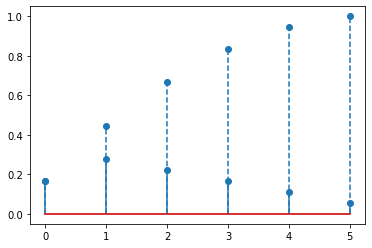

In [25]:
# 1. 확률변수 X에 대한 상태공간 구하기
Sx = list()   # 확률변수
D1 = [1,2,3,4,5,6]
D2 = [1,2,3,4,5,6]
for i in D1:
    for j in D2:
        Sx.append( abs(i-j)  )
print(f'상태공간(Sx) = {Sx}')

# 2.확률변수
X = list(set(Sx))
print(f'확률변수 X = {X}')


# 3. 확률변수에 대한 확률질량함수(fx) 만들기
def f(x):
    cnt = 0
    for i in D1:
        for j in D2:
            if abs(i-j) == x:
                cnt += 1
            
    return cnt / (len(D1)*len(D2))

prob = [ f(x) for x in X ]


# 4. 확률분포함수
def F(x):
    return sum( [f(u) for u in X if u<=x] )

s_prob = [ F(x) for x in X ]

print(f'확률변수X 의 확률질량함수: {dict(zip(X, prob))} ')
print(f'확률변수X 의 확률분포함수: {dict(zip(X, s_prob))} ')


# 그래프로 나타내기
import matplotlib.pyplot as plt
# plt.bar(X, prob, zorder=2)    # 확률질량함수
# plt.bar(X, s_prob, zorder=1)  # 확률분포함수
plt.stem(X, prob)                  # 확률질량함수
plt.stem(X, s_prob, linefmt='--')  # 확률분포함수
plt.show()

In [26]:
# 확률구하기
print(f'P(X=3)     : {F(3) - F(2)}')
print(f'P(2<=X<=4) : {F(4) - F(2) + prob[2]}')
print(f'P(X>=4)    : {1 - F(3)}')

P(X=3)     : 0.16666666666666663
P(2<=X<=4) : 0.5
P(X>=4)    : 0.16666666666666674


---------------------------------------

## 6-2 연속확률변수(Continuous Random Variable)

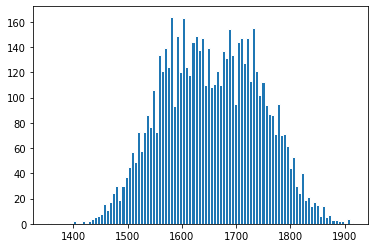

In [48]:
import pandas as pd

df = pd.read_csv('data/data_10.csv', encoding='utf-8')

plt.hist(df.키, bins=100, edgecolor='w')  # df.키 == df['키']
plt.show()

### 20세 이상 남성 키 데이터

In [38]:
#
df = pd.read_csv('data/data_10.csv', encoding='utf-8')
df = df.query("성별 =='남' and (나이>=20 and 나이<30) ")
df['키'] = df['키']//10  # mm --> cm로 단위 변환
print(df.shape)
df


(869, 3)


,성별,나이,키
0,남,25,173.0
1,남,28,183.0
3,남,20,175.0
4,남,22,185.0
5,남,23,178.0
...,...,...,...
4853,남,25,168.0
4856,남,29,174.0
4857,남,25,173.0
4867,남,24,168.0


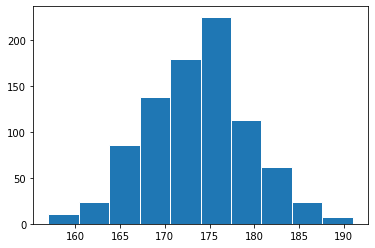

In [35]:
import matplotlib.pyplot as plt

plt.hist(df.키, edgecolor='w')  # df.키 == df['키']
plt.show()

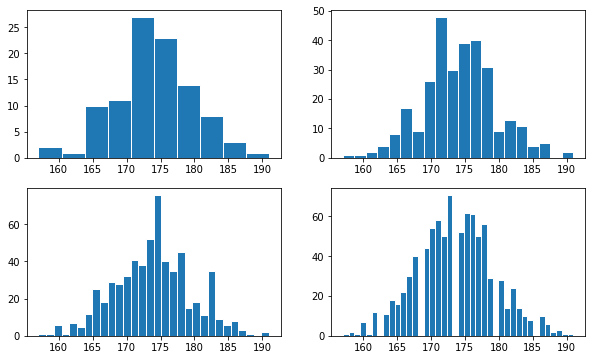

In [45]:
data1 = df.head(100)
data2 = df.head(300)
data3 = df.head(600)
data4 = df

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.hist(data1.키, bins=10, edgecolor='w')
plt.subplot(2,2,2)
plt.hist(data2.키, bins=20, edgecolor='w')
plt.subplot(2,2,3)
plt.hist(data3.키, bins=30, edgecolor='w')
plt.subplot(2,2,4)
plt.hist(data4.키, bins=40, edgecolor='w')
plt.show()

### [실습] 예제 6-7 : 연속확률변수의 확률밀도함수 구하기

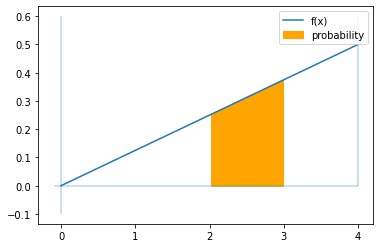

(0.31, 0.00)

In [63]:
import numpy as np

# 1.연속확률변수 구간
X_range = [0, 4]

# 2.확률밀도함수(fx)
def f(x):
    if X_range[0] <= x <= X_range[1]:
        return (1/8*x)
    else:
        return 0
    
# 그래프로 그리기
X = np.linspace(X_range[0], X_range[1], 100) # 0~4를 100개 균등 구간으로 나누기
Y = [ f(x) for x in X]
# print(f'X : {X}')
# print(f'Y : {Y}')

plt.plot(X, Y, label='f(x)')
plt.fill_between(X, Y, where=(X>2)&(X<=3), color='orange', label='probability')
plt.legend()

plt.hlines(0, -0.1, 4, alpha=0.3)
plt.vlines(0, -0.1, 0.6, alpha=0.3)
plt.vlines(X.max(), 0, 0.6, alpha=0.3)

plt.show()


from scipy import integrate
integrate.quad(f, 2, 3)

### [실습] 초등학생의 키

데이터타입: <class 'numpy.ndarray'> 
평균     : 140.00071584187305
표준편차  : 5.006967166246549
확률변수X 145이상~150미만에 속할 확률: 0.13589


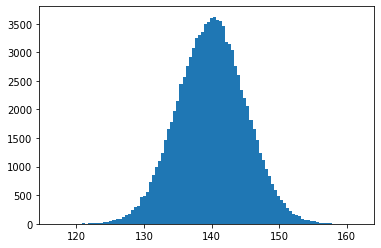

In [86]:
S, MEAN, STD = 100000, 140, 5
data = MEAN + np.random.randn(S) * STD

print(f'데이터타입: { type(data) } ')
print(f'평균     : {data.mean() }')
print(f'표준편차  : {data.std() }')

# 145~150에 속할 확률

prob = len([x for x in data if 145<=x<150])  / S
print(f'확률변수X 145이상~150미만에 속할 확률: {prob}')

plt.hist(data, bins=100)
plt.show()

0.14